---
# Benchmarking
---

In [2]:
from benchmark_main import *

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2022-01-19 15:16:53.897443: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-19 15:16:53.897841: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


_________
_________
# 2D EVALULATION
_________
_________

In [25]:
################################################
#
# C A Y L E Y T R E E 
#
################################################

organism = 'tree'
n = 1093
r = 3
G = nx.full_rary_tree(r,n)

# precalculated Network Distance 
path = 'precalculated/'

file = open(path+'dist_network_1093_tree.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()
dist_network1k = {tuple(map(int,key[1:-1].split(','))):network_distances[key] for key,val in network_distances.items()}

print('G nodes:', len(G.nodes()))
print('G edges:', len(G.edges()))
print('Number of all Node pairs in the network:', len(dist_network1k))
print('Maximum Network Distance:' , max(dist_network1k.values()))

G nodes: 1093
G edges: 1092
Number of all Node pairs in the network: 596778
Maximum Network Distance: 12


### GET NETWORK DISTANCE : NUM OF NODE PAIRS 

In [3]:
from collections import defaultdict
res = defaultdict(set)

for key, val in dist_network1k.items():
        res[val].add(key)
d_res = dict(res)

d_lenv = {}
for k,v in d_res.items():
    len_v = len(v)
    d_lenv[k] = len_v
    
print('Network Distance : Num of nodes Pairs:')
d_lenv

Network Distance : Num of nodes Pairs:


{1: 1092,
 2: 2181,
 3: 3258,
 4: 6480,
 5: 9558,
 6: 18711,
 7: 26244,
 8: 50301,
 9: 65610,
 10: 118098,
 11: 118098,
 12: 177147}

In [4]:
# test: this should match the number of all node pairs calculated 
sum_values = sum(list(d_lenv.values()))

print('Num of all Node pairs ORIGINAL:', len(dist_network1k))
print('Num of all Node pairs after resorting:', sum_values)

Num of all Node pairs ORIGINAL: 596778
Num of all Node pairs after resorting: 596778


In [5]:
dct_lenv = {k:[v] for k,v in d_lenv.items()}
df_lenv = pd.DataFrame.from_dict(dct_lenv, orient='index')
df_lenv.columns = ['Number of Node pairs']
df_lenv.to_csv('Netdist_Nodepairs_'+organism+'.csv', index=False)

---
# CALCULATIONS
---

In [6]:
#-----------------------------
# UMAP PARAMETERS:
#-----------------------------
n_neighbors = 6
spread = 0.9
min_dist = 0.01
metric = 'cosine'
lnr = 1
nep = None

### GLOBAL 

In [7]:
# GLOBAL LAYOUT

feature = 'RWRvis'
r = .9
alpha = 1.0

print('RWR')
start = time.time()
posG_global = globallayout_2D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:12
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9801569252516711


In [13]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

# ------------------------------------------------------
### Example to use precalculated layout distances

In [51]:
file = open('dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', "r")
contents = file.read()
dict_name = ast.literal_eval(contents)
file.close()

# setting the variable name to which file content is represented 
dist_global = {tuple(map(int,key[1:-1].split(','))):dict_name[key] for key,val in dict_name.items()}

# ------------------------------------------------------

In [8]:
d_plot_global = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        dxy = dist_global[nodes]
        l_xy.append(dxy)
    d_plot_global[spldist] = l_xy

### NODE2VEC

In [9]:
print('NODE2VEC')
start = time.time()

posG_nodevec = layout_nodevec_umap(G,2,n_neighbors, spread, min_dist, metric)

end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec)

r_nodevec = pearson_corrcoef(dist_network1k, dist_nodevec)
print('RWR corr coef: ',r_nodevec)

NODE2VEC
Execution Time: 00:01:37
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9314551570273132


In [29]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [10]:
d_plot_nodevec = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_nodevec[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_nodevec[spldist] = l_xy

### FORCE-DIRECTED | NETWORKX 

In [11]:
print('SPRING')
start = time.time()
posG_spring_nx = springlayout_2D(G,itr=40)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring_nx)

r_spring_nx = pearson_corrcoef(dist_network1k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:08
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9207235832355845


In [ ]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [13]:
d_plot_spring_nx = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_nx[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_nx[spldist] = l_xy

### FORCE DIRECTED IGRAPH

In [27]:
iG = ig.Graph.from_networkx(G)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold(niter=48500)
posG_spring_ig = dict(zip(G.nodes(),posG))

posG_spring_ig_norm = minmaxscaling_posG(G, posG_spring_ig)

end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_ig_norm)

r_spring_ig = pearson_corrcoef(dist_network1k, dist_spring_ig)
print('SPRING corr coef: ',r_spring_ig)

SPRING - igraph
Execution Time: 00:00:11
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9778421751941365


In [25]:
path = ''
with open(path+'dist_spring_ig_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [28]:
d_plot_spring_ig = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_ig[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_ig[spldist] = l_xy

### FORCE DIRECTED FA2

In [16]:
from fa2 import ForceAtlas2
print('SPRING - forceAtlas2')
start = time.time()
forceatlas2 = ForceAtlas2(verbose=False)
posG_spring_fa = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=600)
posG_spring_fa_norm = minmaxscaling_posG(G,posG_spring_fa)

end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_fa = pairwise_layout_distance_linalg(pairs,posG_spring_fa_norm)

r_spring_fa = pearson_corrcoef(dist_network1k, dist_spring_fa)
print('SPRING corr coef: ',r_spring_fa)

SPRING - forceAtlas2
Execution Time: 00:00:06
596778
1k done
10k done
50k done
100k done
500k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9616510014680502


In [ ]:
path = ''
with open(path+'dist_spring_fa_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_fa, handle)

In [17]:
d_plot_spring_fa = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_fa[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_fa[spldist] = l_xy

## DIAGRAM

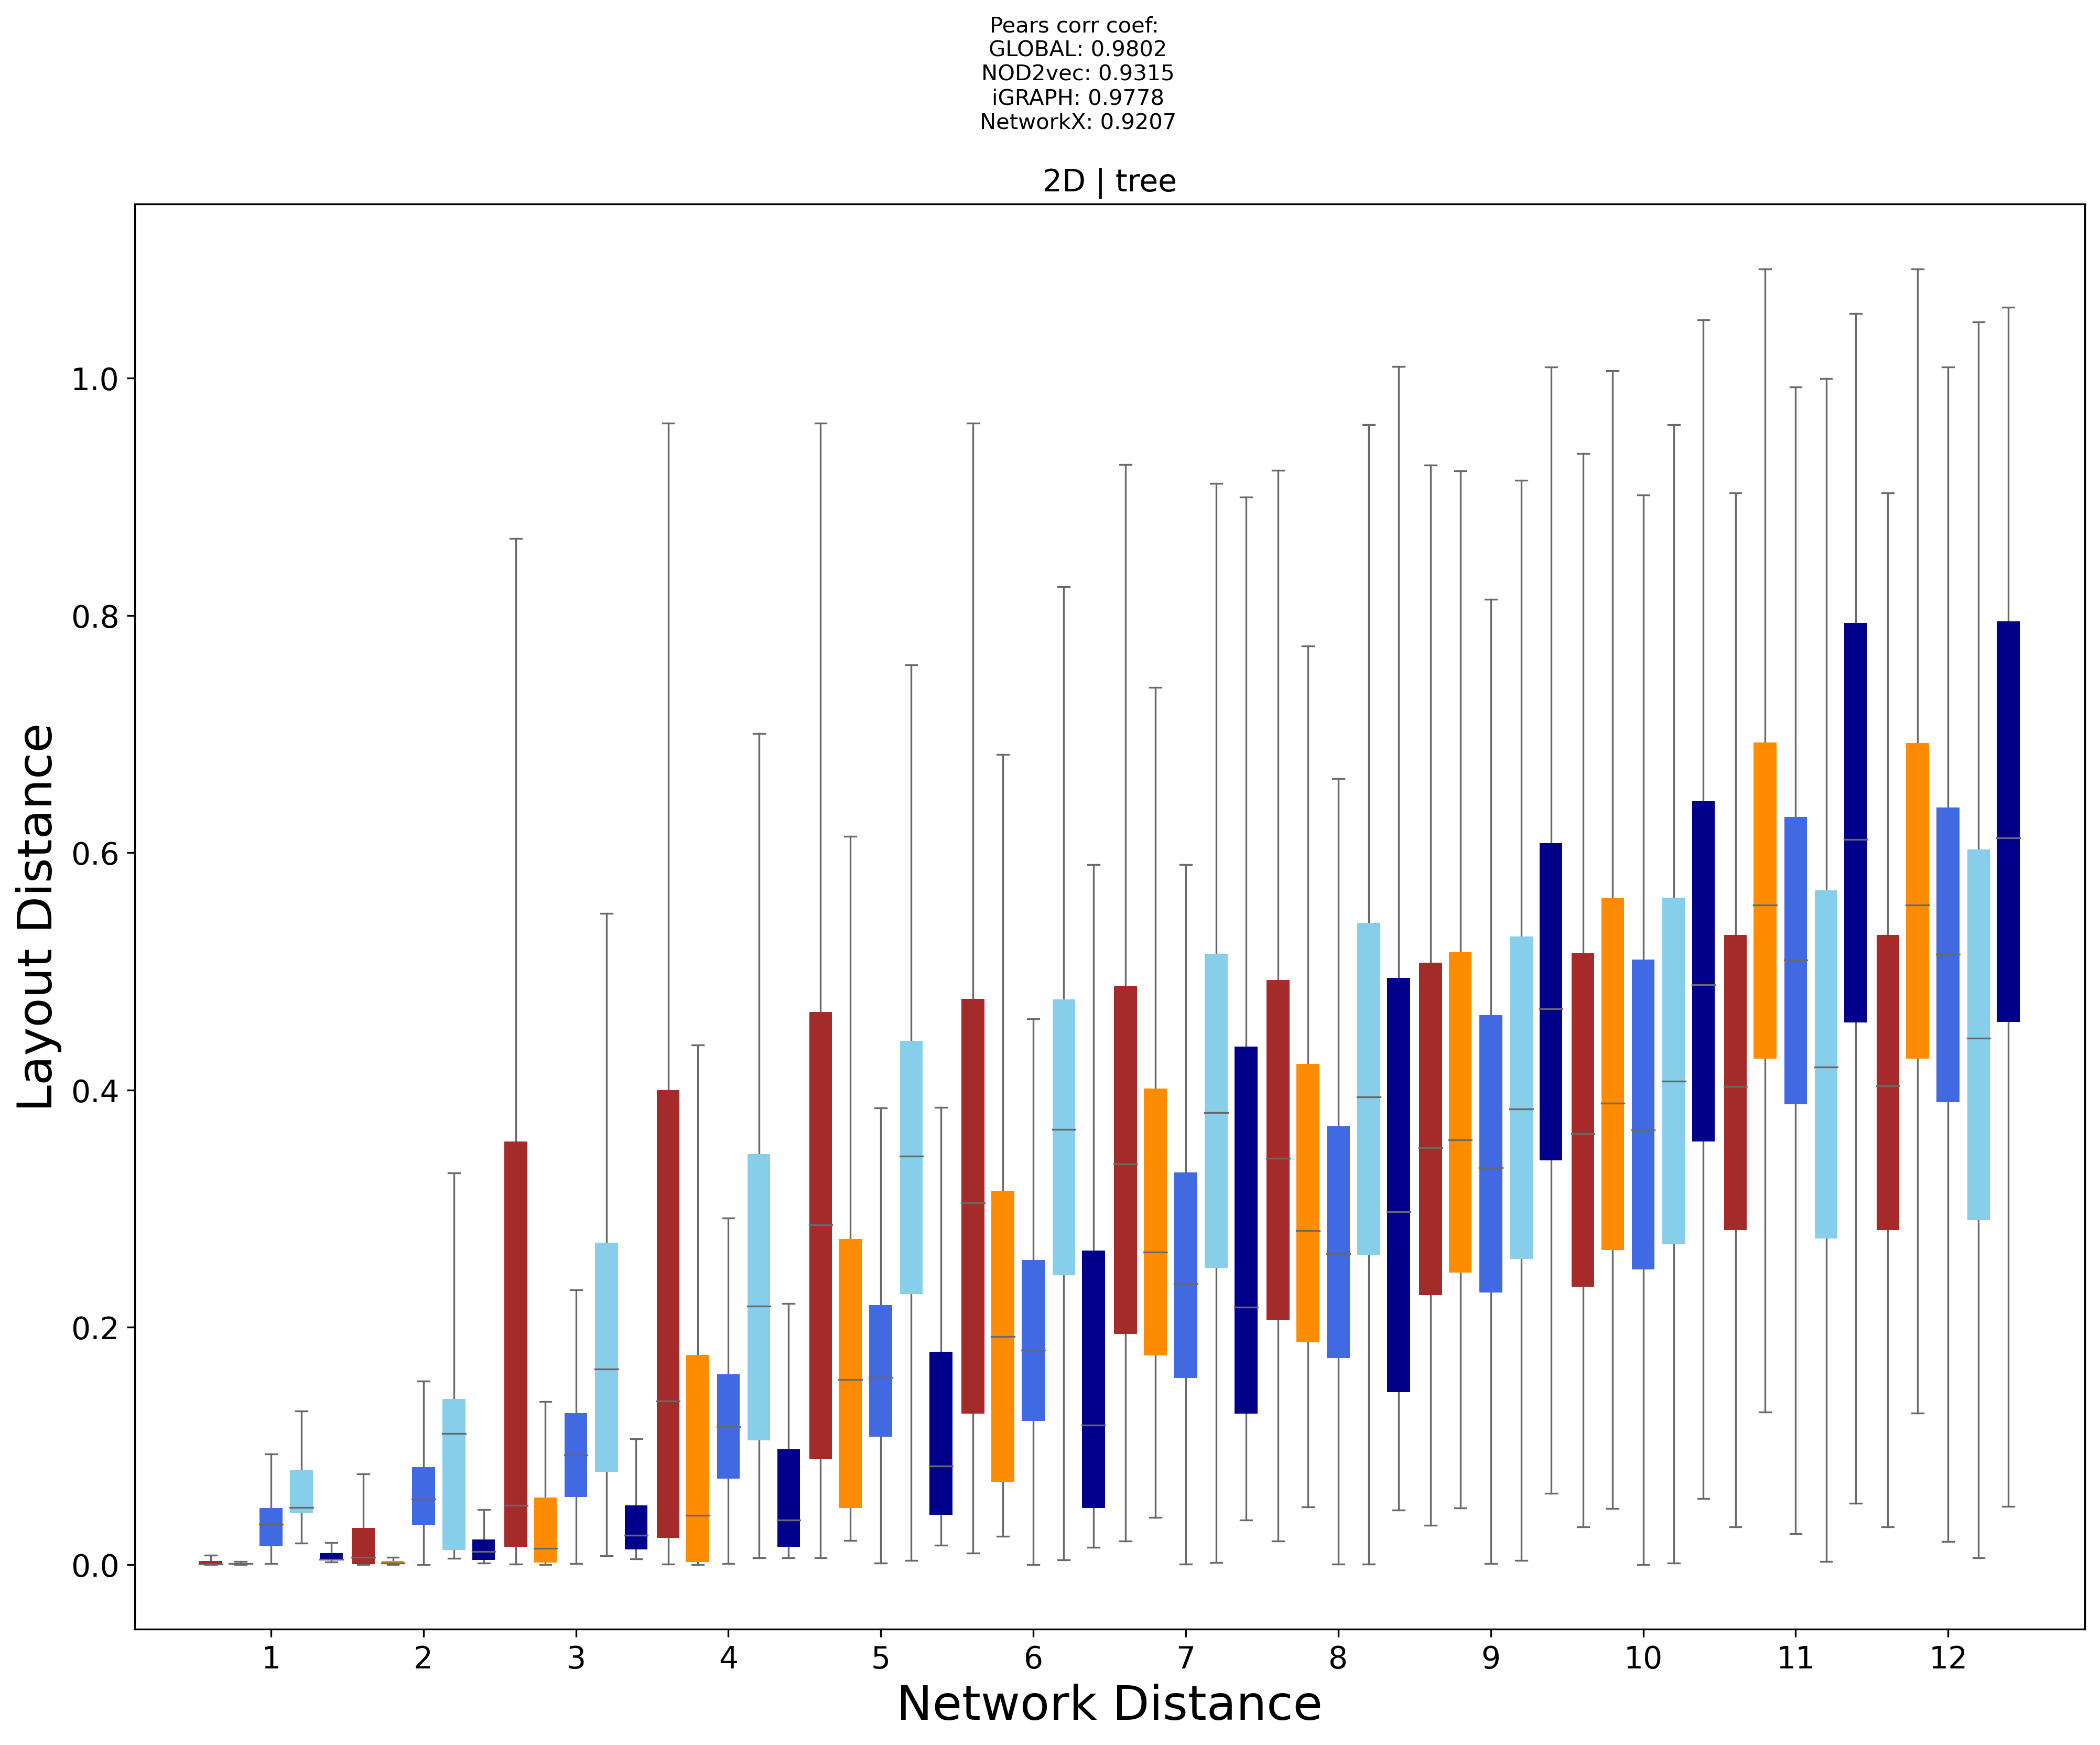

In [30]:
offset = 0.05
width_box = 0.15
boxdist = width_box

lw_general = 0.8
lw_box = 0.0

fig, ax = plt.subplots(figsize =(16,12), dpi=300)
bp_spring_nx = ax.boxplot(d_plot_spring_nx.values(), positions=[i+offset+boxdist for i in list(d_plot_spring_nx.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_spring_fa = ax.boxplot(d_plot_spring_fa.values(), positions=[i+offset+boxdist*2.3 for i in list(d_plot_spring_fa.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_spring_ig = ax.boxplot(d_plot_spring_ig.values(), positions=[i for i in list(d_plot_spring_ig.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_global = ax.boxplot(d_plot_global.values(), positions=[i-offset-boxdist for i in list(d_plot_global.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_nodevec = ax.boxplot(d_plot_nodevec.values(), positions=[i-offset-boxdist*2.3 for i in list(d_plot_nodevec.keys())], widths=width_box, patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp_spring_nx[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_spring_fa[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_spring_ig[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_global[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_nodevec[element], color='dimgrey', linewidth=lw_general)
    
for patch in bp_spring_nx['boxes']:
    patch.set(facecolor='skyblue', linewidth=lw_box)
for patch in bp_spring_fa['boxes']:
    patch.set(facecolor='darkblue', linewidth=lw_box)
for patch in bp_spring_ig['boxes']:
    patch.set(facecolor='royalblue', linewidth=lw_box)
for patch in bp_global['boxes']:
    patch.set(facecolor='darkorange', linewidth=lw_box)
for patch in bp_nodevec['boxes']:
    patch.set(facecolor='brown', linewidth=lw_box)

plt.xlabel('Network Distance', fontsize=22)
plt.ylabel('Layout Distance', fontsize=22)

plt.xticks(range(1,len(d_plot_spring_nx.keys())+1),d_plot_spring_nx.keys(), fontsize=14)
plt.yticks(fontsize=14)

plt.title('2D | '+organism, fontsize=14)
plt.suptitle('Pears corr coef: '+'\n'+'GLOBAL: '+str(round(r_global,4))
             +'\n'+'NOD2vec: '+str(round(r_nodevec,4))
             +'\n'+'iGRAPH: '+str(round(r_spring_ig,4))+'\n'+'NetworkX: '+str(round(r_spring_nx,4)), fontsize=10)

plt.show()
fig.savefig('2Dtoynetwork_NetworkDistances_'+organism+'.png')
fig.savefig('2Dtoynetwork_NetworkDistances_'+organism+'.pdf')

_________
_________
# 3D EVALULATION
_________
_________

In [165]:
################################################
#
# C U B E G R I D
#
################################################

organism = 'cube'
G = nx.grid_graph([10,10,10],periodic=False)

# precalculated Network Distance 
path = 'precalculated/' 

file = open(path+'dist_network_1000_cube.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()

print('G nodes:', len(G.nodes()))
print('G edges:', len(G.edges()))
print('Number of all Node pairs in the network:', len(dist_network1k))
print('Maximum Network Distance:' , max(dist_network1k.values()))

G nodes: 1000
G edges: 2700
Number of all Node pairs in the network: 468028
Maximum Network Distance: 33


In [166]:
dist_network1k = {}

for i,v in network_distances.items(): 
    new = i.strip('()')
    nnew = new.split(',')
    sub=[]
    for n in nnew:
        mod = n.strip(') ')
        sub.append(mod)
    new_sub = []
    for i in sub:
        j = i.strip(' (')
        new_sub.append(int(j))
    tup1 = []
    for elem in new_sub[:3]:
        tup1.append(elem)
    tup2 = []
    for elem in new_sub[3:]:
        tup2.append(elem)
    
    dist_network1k[(tuple(tup1),tuple(tup2))] = v

### GET NETWORK DISTANCE : NUM OF NODE PAIRS 

In [32]:
from collections import defaultdict
res = defaultdict(set)

for key, val in dist_network1k.items():
        res[val].add(key)
d_res = dict(res)

d_lenv = {}
for k,v in d_res.items():
    len_v = len(v)
    d_lenv[k] = len_v
    
print('Network Distance : Num of nodes Pairs:')
d_lenv

Network Distance : Num of nodes Pairs:


{1: 2700,
 2: 7260,
 3: 13656,
 4: 20976,
 5: 28416,
 6: 35276,
 7: 40956,
 8: 44952,
 9: 46852,
 10: 46332,
 11: 43452,
 12: 38832,
 13: 33240,
 14: 27300,
 15: 21500,
 16: 16200,
 17: 11640,
 18: 7948,
 19: 5148,
 20: 3168,
 21: 1848,
 22: 1008,
 23: 504,
 24: 224,
 25: 84,
 26: 24,
 27: 4}

In [33]:
# test: this should match the number of all node pairs calculated 
sum_values = sum(list(d_lenv.values()))

print('Num of all Node pairs ORIGINAL:', len(dist_network1k))
print('Num of all Node pairs after resorting:', sum_values)

Num of all Node pairs ORIGINAL: 499500
Num of all Node pairs after resorting: 499500


In [34]:
dct_lenv = {k:[v] for k,v in d_lenv.items()}
df_lenv = pd.DataFrame.from_dict(dct_lenv, orient='index')
df_lenv.columns = ['Number of Node pairs']
df_lenv.to_csv('Netdist_Nodepairs_'+organism+'.csv', index=False)

---
# CALCULATIONS
---

### GLOBAL 

In [167]:
# GLOBAL LAYOUT 

#-----------------------------
# UMAP PARAMETERS:
#-----------------------------
n_neighbors = 10 #10 #8 #12
spread = 0.9 
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

feature = 'RWRvis'
r = .9
alpha = 1.0

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:18
499500
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9821018873310795


In [ ]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

# ------------------------------------------------------
### Example to use precalculated layout distances

In [51]:
file = open('dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', "r")
contents = file.read()
dict_name = ast.literal_eval(contents)
file.close()

In [ ]:
dist_global = {}

for i,v in dict_name.items(): 
    new = i.strip('()')
    nnew = new.split(',')
    sub=[]
    for n in nnew:
        mod = n.strip(') ')
        sub.append(mod)
    new_sub = []
    for i in sub:
        j = i.strip(' (')
        new_sub.append(int(j))
    tup1 = []
    for elem in new_sub[:3]:
        tup1.append(elem)
    tup2 = []
    for elem in new_sub[3:]:
        tup2.append(elem)
    
    dist_global[(tuple(tup1),tuple(tup2))] = v

# ------------------------------------------------------

In [168]:
d_plot_global = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        dxy = dist_global[nodes]
        l_xy.append(dxy)
    d_plot_global[spldist] = l_xy

### NODE2VEC

In [169]:
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('NODE2VEC')
start = time.time()

posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)

end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))
pairs = list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_nodevec = pearson_corrcoef(dist_network1k, dist_nodevec)
print('RWR corr coef: ',r_nodevec)

NODE2VEC
Execution Time: 00:01:51
499500
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9731836378923495


In [42]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [170]:
d_plot_nodevec = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_nodevec[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_nodevec[spldist] = l_xy

### FORCE-DIRECTED | NETWORKX 

In [179]:
print('SPRING')
start = time.time()
posG_spring_nx = springlayout_3D(G,itr=59)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring_nx)

r_spring_nx = pearson_corrcoef(dist_network1k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:09
499500
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9416505774048085


In [44]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [180]:
d_plot_spring_nx = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_nx[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_nx[spldist] = l_xy

### FORCE-DIRECTED | IGRAPH

In [209]:
iG = ig.Graph.from_networkx(G)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=3900)
posG_spring_ig = dict(zip(G.nodes(),posG))

posG_spring_ig_norm = minmaxscaling_posG(G,posG_spring_ig)

end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_ig_norm)

r_spring_ig = pearson_corrcoef(dist_network1k, dist_spring_ig)
print('SPRING corr coef: ',r_spring_ig)

SPRING - igraph
Execution Time: 00:00:17
499500
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.995109869529837


In [46]:
path = ''
with open(path+'dist_spring_ig_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [210]:
d_plot_spring_ig = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_ig[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_ig[spldist] = l_xy

## DIAGRAM

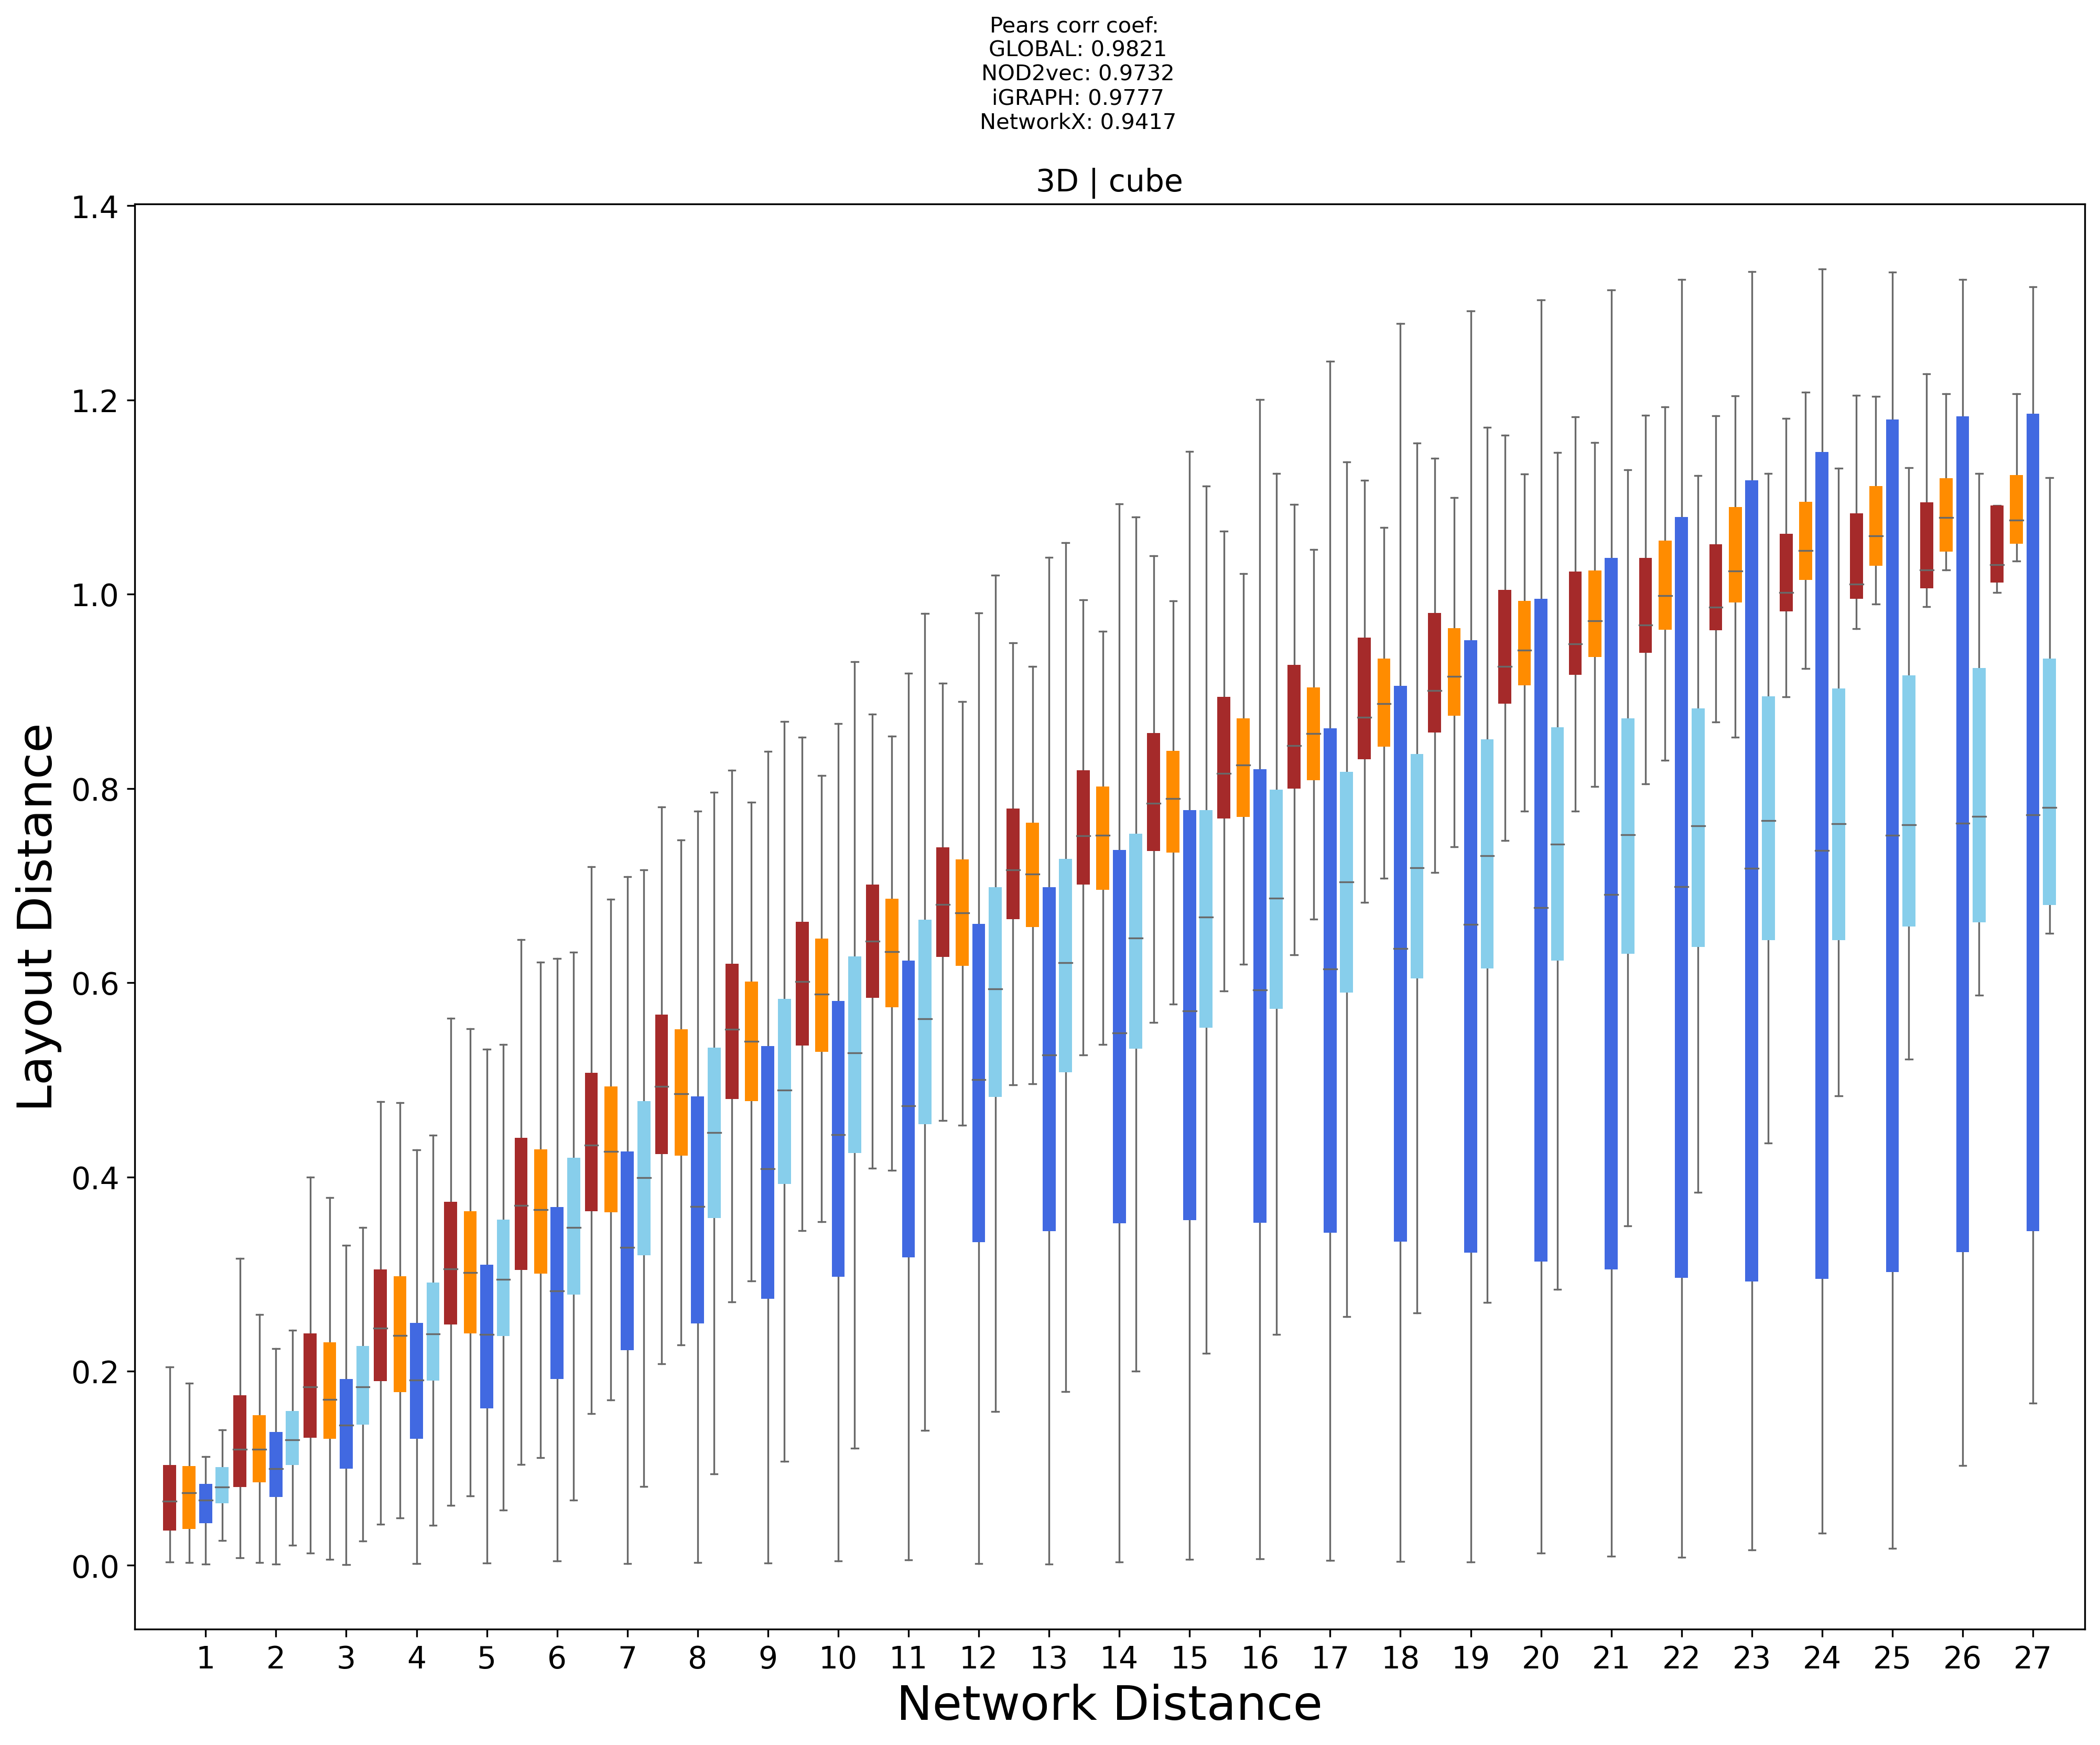

In [185]:
offset = 0.05
width_box = 0.185
boxdist = width_box # 0.01

lw_general = 0.8
lw_box = 0.0

fig, ax = plt.subplots(figsize =(16,12), dpi=300)
bp_spring_nx = ax.boxplot(d_plot_spring_nx.values(), positions=[i+offset+boxdist for i in list(d_plot_spring_nx.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_spring_ig = ax.boxplot(d_plot_spring_ig.values(), positions=[i for i in list(d_plot_spring_ig.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_global = ax.boxplot(d_plot_global.values(), positions=[i-offset-boxdist for i in list(d_plot_global.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_nodevec= ax.boxplot(d_plot_nodevec.values(), positions=[i-offset-boxdist*2.5 for i in list(d_plot_nodevec.keys())], widths=width_box, patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp_spring_nx[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_spring_ig[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_global[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_nodevec[element], color='dimgrey', linewidth=lw_general)
    
for patch in bp_spring_nx['boxes']:
    patch.set(facecolor='skyblue', linewidth=lw_box)
for patch in bp_spring_ig['boxes']:
    patch.set(facecolor='royalblue', linewidth=lw_box)
for patch in bp_global['boxes']:
    patch.set(facecolor='darkorange', linewidth=lw_box)
for patch in bp_nodevec['boxes']:
    patch.set(facecolor='brown', linewidth=lw_box)

plt.xlabel('Network Distance', fontsize=22)
plt.ylabel('Layout Distance', fontsize=22)

plt.xticks(range(1,len(d_plot_spring_nx.keys())+1),d_plot_spring_nx.keys(), fontsize=14)
plt.yticks(fontsize=14)

plt.title('3D | '+organism, fontsize=14)
plt.suptitle('Pears corr coef: '+'\n'+'GLOBAL: '+str(round(r_global,4))+'\n'+'NOD2vec: '+str(round(r_nodevec,4))+'\n'+'iGRAPH: '+str(round(r_spring_ig,4))+'\n'+'NetworkX: '+str(round(r_spring_nx,4)), fontsize=10)

plt.show()
fig.savefig('3Dtoynetwork_NetworkDistances_'+organism+'.png')
fig.savefig('3Dtoynetwork_NetworkDistances_'+organism+'.pdf')

In [147]:
################################################
#
# T O R U S L A T T I C E 
#
################################################

organism = 'torus'
G = nx.grid_2d_graph(44,22,periodic=True)

# precalculated Network Distance 
path = 'precalculated/'

file = open(path+'dist_network_968_torus.txt', "r")
contents = file.read()
network_distances = ast.literal_eval(contents)
file.close()

print('G nodes:', len(G.nodes()))
print('G edges:', len(G.edges()))
print('Number of all Node pairs in the network:', len(dist_network1k))
print('Maximum Network Distance:' , max(dist_network1k.values()))

G nodes: 968
G edges: 1936
Number of all Node pairs in the network: 499500
Maximum Network Distance: 27


In [150]:
dist_network1k = {}

for i,v in network_distances.items(): 
    new = i.strip('()')
    nnew = new.split(',')
    sub=[]
    for n in nnew:
        mod = n.strip(') ')
        sub.append(mod)
    new_sub = []
    for i in sub:
        j = i.strip(' (')
        new_sub.append(int(j))
    tup1 = []
    for elem in new_sub[:2]:
        tup1.append(elem)
    tup2 = []
    for elem in new_sub[2:]:
        tup2.append(elem)
    
    dist_network1k[(tuple(tup1),tuple(tup2))] = v

### GET NETWORK DISTANCE : NUM OF NODE PAIRS 

In [172]:
from collections import defaultdict
res = defaultdict(set)

for key, val in dist_network1k.items():
        res[val].add(key)
d_res = dict(res)

d_lenv = {}
for k,v in d_res.items():
    len_v = len(v)
    d_lenv[k] = len_v
    
print('Network Distance : Num of nodes Pairs:')
d_lenv

Network Distance : Num of nodes Pairs:


{1: 1936,
 2: 3872,
 3: 5808,
 4: 7744,
 5: 9680,
 6: 11616,
 7: 13552,
 8: 15488,
 9: 17424,
 10: 19360,
 11: 20812,
 12: 21296,
 13: 21296,
 14: 21296,
 15: 21296,
 16: 21296,
 17: 21296,
 18: 21296,
 19: 21296,
 20: 21296,
 21: 21296,
 22: 20812,
 23: 19360,
 24: 17424,
 25: 15488,
 26: 13552,
 27: 11616,
 28: 9680,
 29: 7744,
 30: 5808,
 31: 3872,
 32: 1936,
 33: 484}

In [162]:
# test: this should match the number of all node pairs calculated 
sum_values = sum(list(d_lenv.values()))

print('Num of all Node pairs ORIGINAL:', len(dist_network1k))
print('Num of all Node pairs after resorting:', sum_values)

Num of all Node pairs ORIGINAL: 468028
Num of all Node pairs after resorting: 468028


In [163]:
dct_lenv = {k:[v] for k,v in d_lenv.items()}
df_lenv = pd.DataFrame.from_dict(dct_lenv, orient='index')
df_lenv.columns = ['Number of Node pairs']
df_lenv.to_csv('Netdist_Nodepairs_'+organism+'.csv', index=False)

---
# CALCULATIONS
---

### GLOBAL 

In [152]:
# GLOBAL LAYOUT 

#-----------------------------
# UMAP PARAMETERS:
#-----------------------------
n_neighbors = 10 #10 #8 #12
spread = 0.9 
min_dist = 0.0
metric = 'cosine'
lnr = 1
nep = None

feature = 'RWRvis'
r = .9
alpha = 1.0

print('RWR')
start = time.time()
posG_global = globallayout_3D(G,n_neighbors, spread, min_dist, metric)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_global = pairwise_layout_distance_linalg(pairs,posG_global)

r_global = pearson_corrcoef(dist_network1k, dist_global)
print('RWR corr coef: ',r_global)

RWR
Execution Time: 00:00:20
468028
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9725428010283926


In [49]:
path = ''
with open(path+'dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_global, handle)

# ------------------------------------------------------
### Example to use precalculated layout distances

In [154]:
file = open('dist_global_'+str(len(G.nodes()))+'_'+organism+'.txt', "r")
contents = file.read()
dict_name = ast.literal_eval(contents)
file.close()

In [155]:
dist_global = {}

for i,v in dict_name.items(): 
    new = i.strip('()')
    nnew = new.split(',')
    sub=[]
    for n in nnew:
        mod = n.strip(') ')
        sub.append(mod)
    new_sub = []
    for i in sub:
        j = i.strip(' (')
        new_sub.append(int(j))
    tup1 = []
    for elem in new_sub[:2]:
        tup1.append(elem)
    tup2 = []
    for elem in new_sub[2:]:
        tup2.append(elem)
    
    dist_global[(tuple(tup1),tuple(tup2))] = v

# ------------------------------------------------------

In [157]:
d_plot_global = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        dxy = dist_global[nodes]
        l_xy.append(dxy)
    d_plot_global[spldist] = l_xy

### NODE2VEC

In [158]:
start = 1
G_ = nx.convert_node_labels_to_integers(G,first_label=start)

print('NODE2VEC')
start = time.time()

posG_nodevec = layout_nodevec_umap(G_,3,n_neighbors, spread, min_dist, metric)

end = time.time()
m,s = exec_time(start,end)

posG_nodevec_mod = dict(zip(list(G.nodes()),posG_nodevec.values()))
pairs = list(dist_network1k.keys())
dist_nodevec = pairwise_layout_distance_linalg(pairs,posG_nodevec_mod)

r_nodevec = pearson_corrcoef(dist_network1k, dist_nodevec)
print('RWR corr coef: ',r_nodevec)

NODE2VEC
Execution Time: 00:01:47
468028
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
RWR corr coef:  0.9487198062205339


In [51]:
path = ''
with open(path+'dist_nodevec_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_nodevec, handle)

In [159]:
d_plot_nodevec = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_nodevec[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_nodevec[spldist] = l_xy

### FORCE-DIRECTED | NETWORKX 

In [160]:
print('SPRING')
start = time.time()
posG_spring_nx = springlayout_3D(G,itr=142)
end = time.time()
m,s = exec_time(start,end)

pairs = list(dist_network1k.keys())
dist_spring_nx = pairwise_layout_distance_linalg(pairs,posG_spring_nx)

r_spring_nx = pearson_corrcoef(dist_network1k, dist_spring_nx)
print('SPRING corr coef: ',r_spring_nx)

SPRING
Execution Time: 00:00:20
468028
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9459077057733096


In [53]:
path = ''
with open(path+'dist_spring_nx_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_nx, handle)

In [161]:
d_plot_spring_nx = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_nx[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_nx[spldist] = l_xy

### FORCE-DIRECTED | IGRAPH

In [162]:
iG = ig.Graph.from_networkx(G)

print('SPRING - igraph')
start = time.time()
posG  = iG.layout_fruchterman_reingold_3d(niter=7950)
posG_spring_ig = dict(zip(G.nodes(),posG))

posG_spring_ig_norm = minmaxscaling_posG(G,posG_spring_ig)

end = time.time()
m,s = exec_time(start,end)

pairs=list(dist_network1k.keys())
dist_spring_ig = pairwise_layout_distance_linalg(pairs,posG_spring_ig_norm)

r_spring_ig = pearson_corrcoef(dist_network1k, dist_spring_ig)
print('SPRING corr coef: ',r_spring_ig)

SPRING - igraph
Execution Time: 00:00:29
468028
1k done
10k done
50k done
100k done
complete
done layout distances prep
calculate pearson correlation coefficient
SPRING corr coef:  0.9732251221333182


In [55]:
path = ''
with open(path+'dist_spring_ig_'+str(len(G.nodes()))+'_'+organism+'.txt', 'wb') as handle:
    pickle.dump(dist_spring_ig, handle)

In [163]:
d_plot_spring_ig = {}
for spldist in range(1,int(max(dist_network1k.values()))+1):
    l_s = []
    for k, v in dist_network1k.items():
        if v == spldist:
            l_s.append(k)
    l_xy = []
    for nodes in l_s:
        try:
            dxy = dist_spring_ig[nodes]
            l_xy.append(dxy)
        except:
            pass
    d_plot_spring_ig[spldist] = l_xy

## DIAGRAM

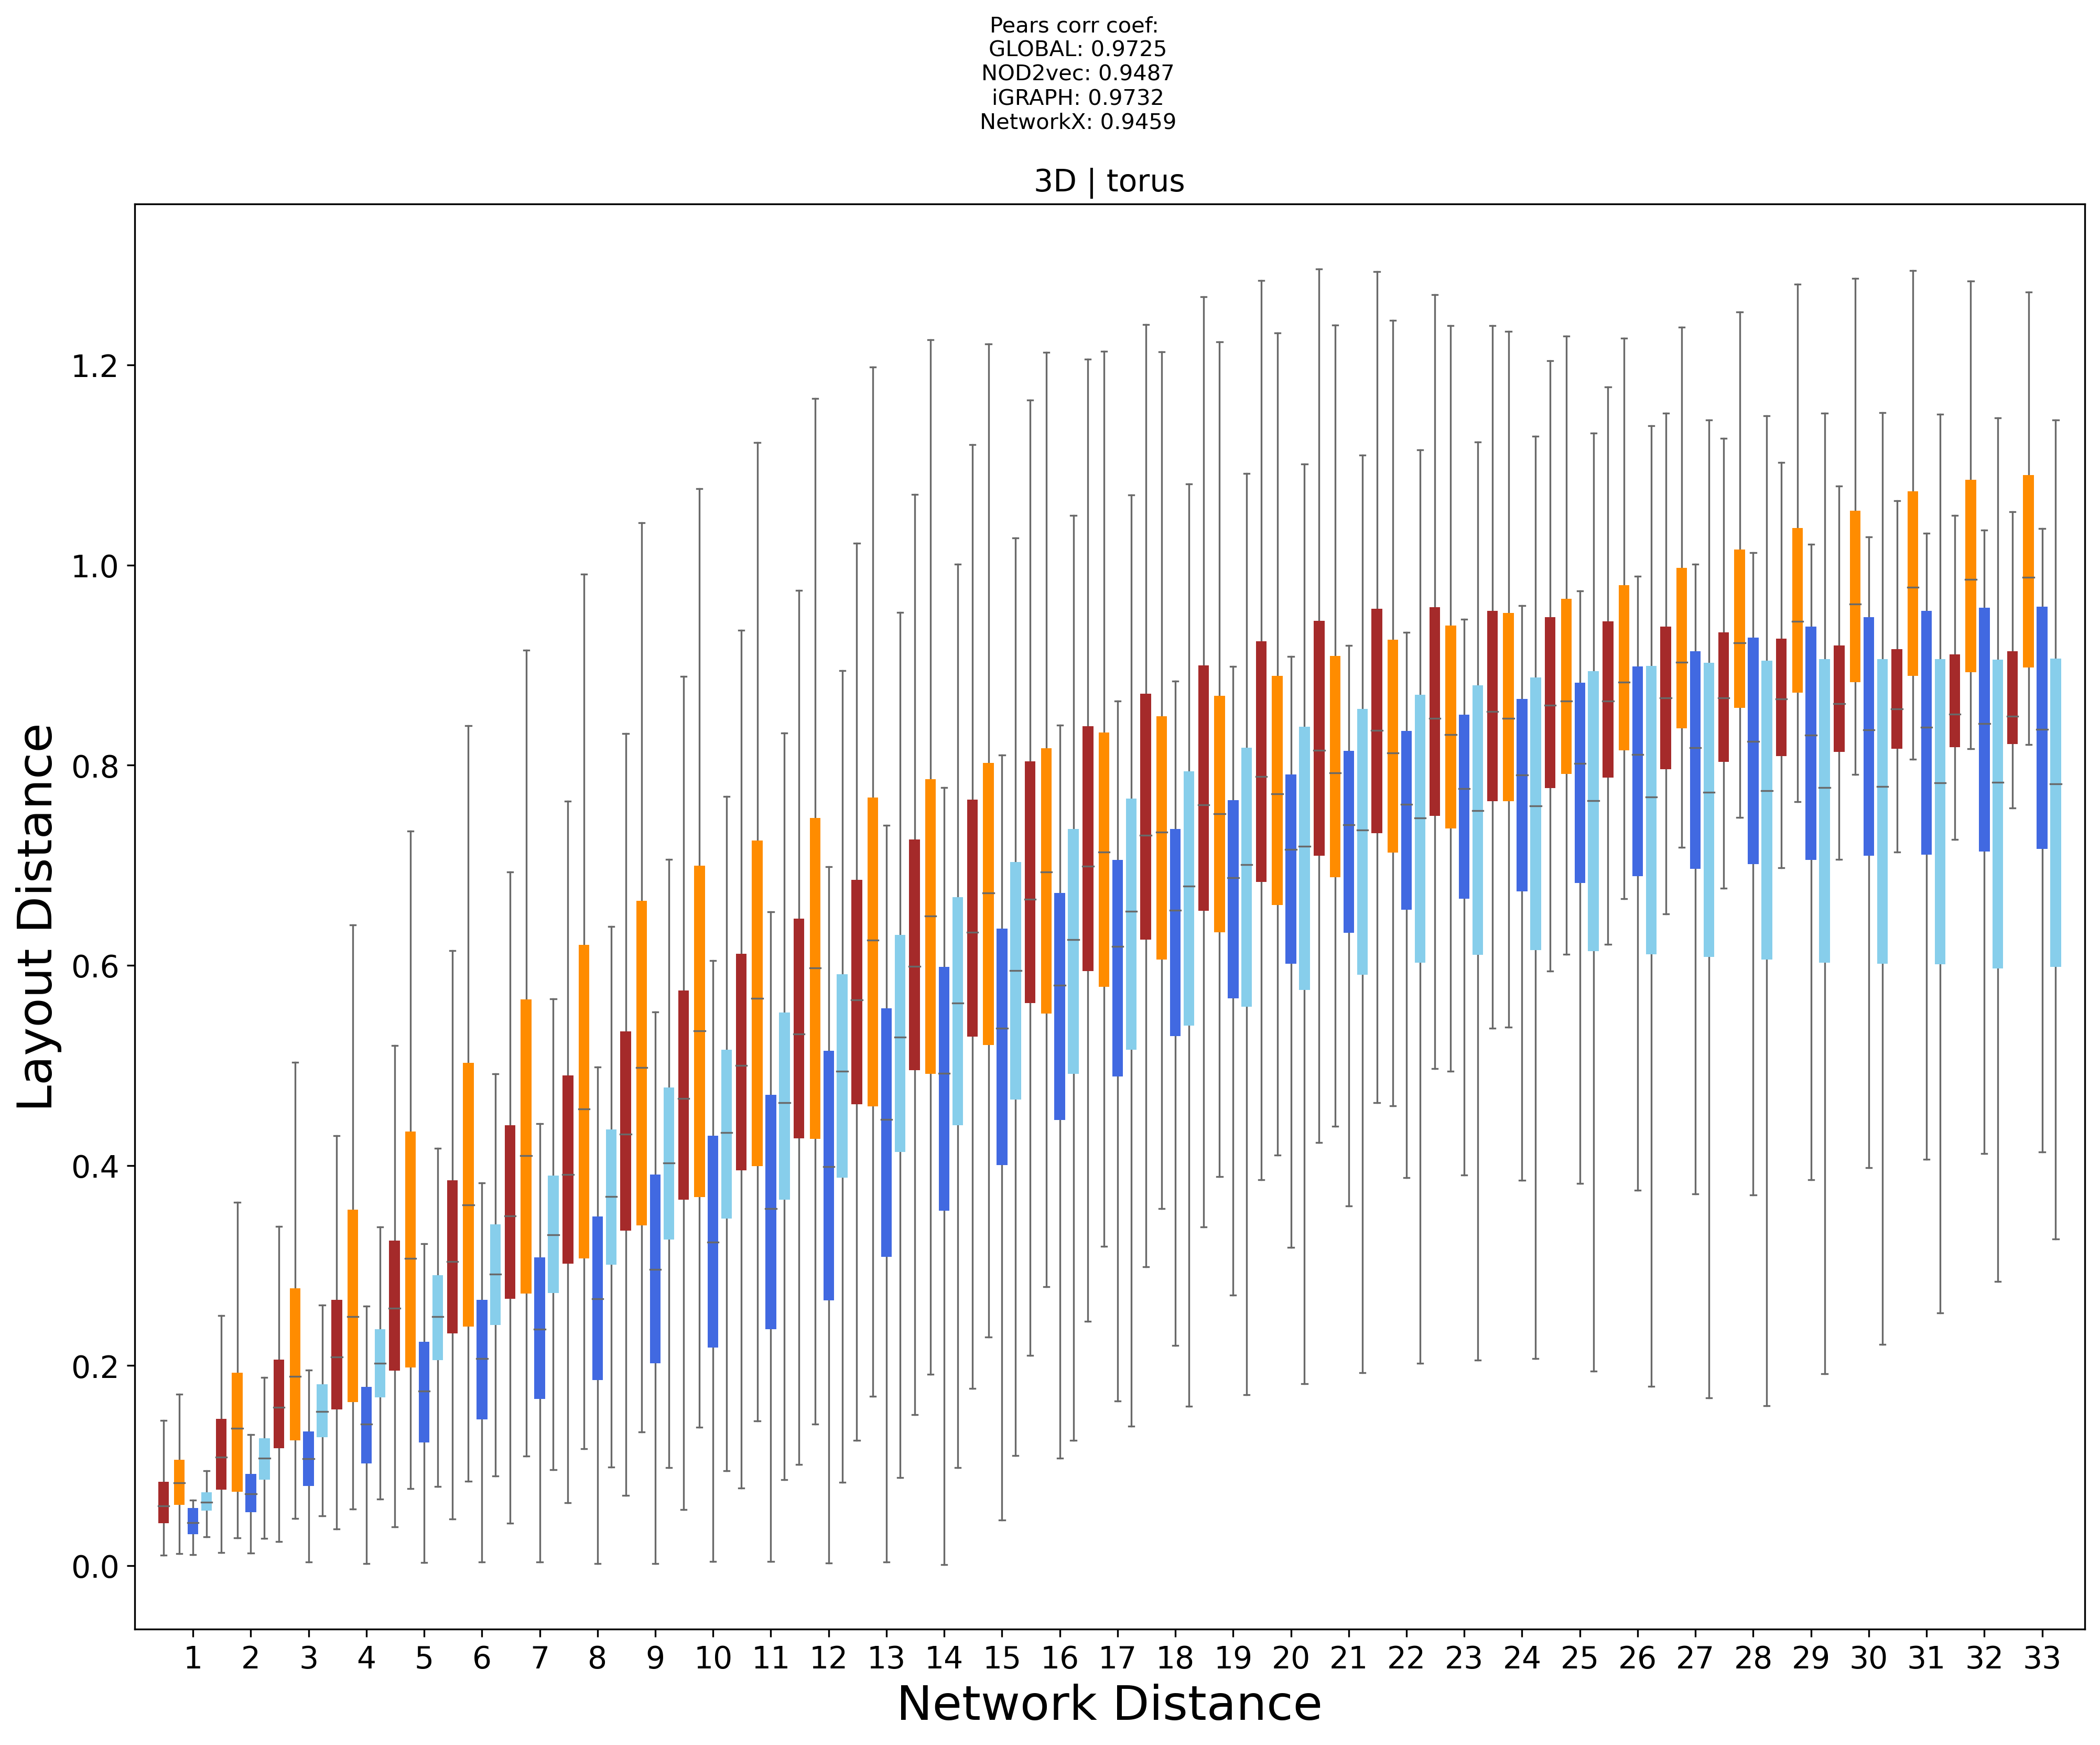

In [164]:
offset = 0.05
width_box = 0.185
boxdist = width_box # 0.01

lw_general = 0.8
lw_box = 0.0 

fig, ax = plt.subplots(figsize =(16,12), dpi=300)
bp_spring_nx = ax.boxplot(d_plot_spring_nx.values(), positions=[i+offset+boxdist for i in list(d_plot_spring_nx.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_spring_ig = ax.boxplot(d_plot_spring_ig.values(), positions=[i for i in list(d_plot_spring_ig.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_global = ax.boxplot(d_plot_global.values(), positions=[i-offset-boxdist for i in list(d_plot_global.keys())], widths=width_box, patch_artist=True, showfliers=False)
bp_nodevec= ax.boxplot(d_plot_nodevec.values(), positions=[i-offset-boxdist*2.5 for i in list(d_plot_nodevec.keys())], widths=width_box, patch_artist=True, showfliers=False)

for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp_spring_nx[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_spring_ig[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_global[element], color='dimgrey', linewidth=lw_general)
    plt.setp(bp_nodevec[element], color='dimgrey', linewidth=lw_general)
    
for patch in bp_spring_nx['boxes']:
    patch.set(facecolor='skyblue', linewidth=lw_box)
for patch in bp_spring_ig['boxes']:
    patch.set(facecolor='royalblue', linewidth=lw_box)
for patch in bp_global['boxes']:
    patch.set(facecolor='darkorange', linewidth=lw_box)
for patch in bp_nodevec['boxes']:
    patch.set(facecolor='brown', linewidth=lw_box)
    
plt.xlabel('Network Distance', fontsize=22)
plt.ylabel('Layout Distance', fontsize=22)

plt.xticks(range(1,len(d_plot_spring_nx.keys())+1),d_plot_spring_nx.keys(), fontsize=14)
plt.yticks(fontsize=14)

plt.title('3D | '+organism, fontsize=14)
plt.suptitle('Pears corr coef: '+'\n'+'GLOBAL: '+str(round(r_global,4))+'\n'+'NOD2vec: '+str(round(r_nodevec,4))+'\n'+'iGRAPH: '+str(round(r_spring_ig,4))+'\n'+'NetworkX: '+str(round(r_spring_nx,4)), fontsize=10)

plt.show()
fig.savefig('3Dtoynetwork_NetworkDistances_'+organism+'.png')
fig.savefig('3Dtoynetwork_NetworkDistances_'+organism+'.pdf')